In [1]:
import pandas as pd
import numpy as np
import os
import wrangle
import model

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

# Acquire

In [2]:
df = wrangle.get_rs_data()
df.head(3).T

,0,1,2
business_id,85936,5827,94910
business_name,Laurel Court,HILLCREST ELEMENTARY SCHOOL,Ike's Kitchen
business_address,950 Mason St,810 SILVER Ave,800 Van Ness Ave
business_city,San Francisco,San Francisco,San Francisco
business_state,CA,CA,CA
business_postal_code,94108,94134,94109
business_latitude,NaN,37.729016,NaN
business_longitude,NaN,-122.419253,NaN
business_location,NaN,POINT (-122.419253 37.729016),NaN
business_phone_number,14155775000.0,14155464722.0,NaN


# Prepare

In [3]:
df = wrangle.prep_rs_data(df)
df.head(3).T

inspection_date,2016-10-04,2016-10-04,2016-10-04
business_name,A1 Geneva Bakery,Stacks Restaurant,Stacks Restaurant
business_address,959 GENEVA Ave,501 Hayes St,501 Hayes St
business_postal_code,94112,94102,94102
business_latitude,37.715986,37.776623,37.776623
business_longitude,-122.440039,-122.424787,-122.424787
business_location,POINT (-122.440039 37.715986),POINT (-122.424787 37.776623),POINT (-122.424787 37.776623)
inspection_id,35828_20161004,33468_20161004,33468_20161004
inspection_score,79.0,84.0,84.0
inspection_type,Routine - Unscheduled,Routine - Unscheduled,Routine - Unscheduled
violation_id,35828_20161004_103147,33468_20161004_103153,33468_20161004_103150


In [4]:
df['business_category'] = df['business_name'].apply(wrangle.categorize_business)

### Restaurant inspection scores

In [5]:
df_restaurant = df[df.business_category == 'Restaurant']
df_restaurant_score = df_restaurant[['inspection_score']]

df_restaurant_score.head()



,inspection_score
inspection_date,
2016-10-04,84.0
2016-10-04,84.0
2016-10-04,82.0
2016-10-04,90.0
2016-10-04,84.0


### Cafe & Bakery Inspection Scores

In [6]:
df_cafe = df[df.business_category == 'Cafe & Bakery']
df_cafe_score = df_cafe[['inspection_score']]

df_cafe_score.shape

(3360, 1)

### Education Facility 

In [7]:
df_education = df[df.business_category == 'Education']
df_education_score = df_education[['inspection_score']]

df_education_score.head()

,inspection_score
inspection_date,
2016-10-06,98.0
2016-10-12,98.0
2016-10-13,98.0
2016-10-14,92.0
2016-10-14,98.0


## Split Data
- Education

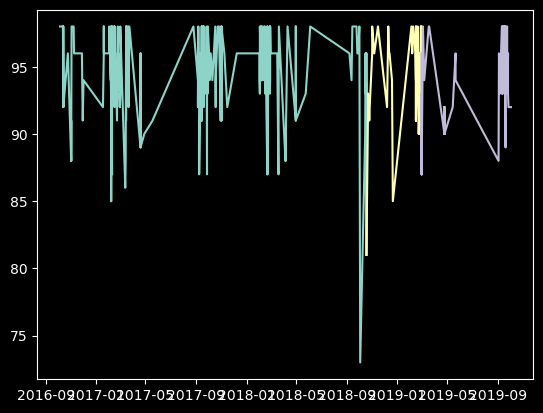

In [8]:
education_train, education_val, education_test = wrangle.split_data(df, 'Education')
wrangle.plot_train_data(education_train, education_val, education_test)

## Split Data
- Cafe & Bakery 

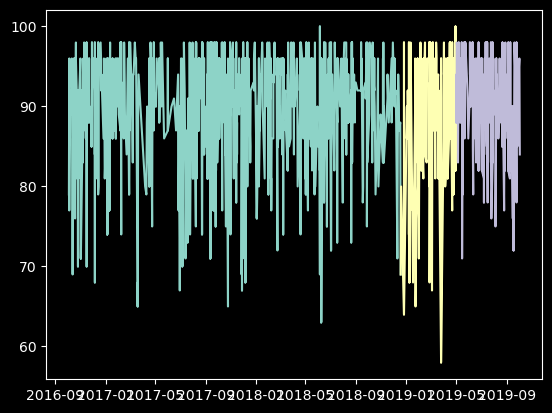

In [9]:
cafe_train, cafe_val, cafe_test = wrangle.split_data(df, "Cafe & Bakery")
wrangle.plot_train_data(cafe_train, cafe_val, cafe_test)


## Split Data
- Restaurant

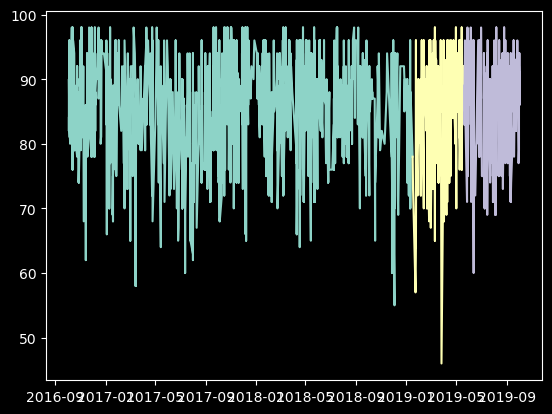

In [10]:
restaurant_train, restaurant_val, restaurant_test = wrangle.split_data(df, 'Restaurant')
wrangle.plot_train_data(restaurant_train, restaurant_val, restaurant_test)

# Explore

### Top Violations
- Everything/ Overall 

In [11]:
df.violation_description.value_counts()[:10]

Unclean or degraded floors walls or ceilings                          1929
Unapproved or unmaintained equipment or utensils                      1533
Inadequately cleaned or sanitized food contact surfaces               1429
Moderate risk food holding temperature                                1338
Inadequate and inaccessible handwashing facilities                    1198
Foods not protected from contamination                                1029
Moderate risk vermin infestation                                       972
Wiping cloths not clean or properly stored or inadequate sanitizer     895
Unclean nonfood contact surfaces                                       860
Improper food storage                                                  804
Name: violation_description, dtype: int64

In [12]:
df_ = df[df.business_category == 'Education']
df_education_score = df_education[['inspection_score']]
df_education_score.head()

,inspection_score
inspection_date,
2016-10-06,98.0
2016-10-12,98.0
2016-10-13,98.0
2016-10-14,92.0
2016-10-14,98.0


In [13]:
df.head(2)

,business_name,business_address,business_postal_code,business_latitude,business_longitude,business_location,inspection_id,inspection_score,inspection_type,violation_id,violation_description,risk_category,Year,Month,business_category
inspection_date,,,,,,,,,,,,,,,
2016-10-04,A1 Geneva Bakery,959 GENEVA Ave,94112,37.715986,-122.440039,POINT (-122.440039 37.715986),35828_20161004,79.0,Routine - Unscheduled,35828_20161004_103147,Inadequate ventilation or lighting,Low Risk,2016,10,Cafe & Bakery
2016-10-04,Stacks Restaurant,501 Hayes St,94102,37.776623,-122.424787,POINT (-122.424787 37.776623),33468_20161004,84.0,Routine - Unscheduled,33468_20161004_103153,Inadequate dressing rooms or improper storage ...,Low Risk,2016,10,Restaurant


### Top Violations
- Educational Facilities 

In [14]:
# looking at the top 10 violations for educational facilities
tv_education = df[df.business_category == 'Education']
tv_education.violation_description.value_counts()[:10]

Unapproved or unmaintained equipment or utensils                      58
Wiping cloths not clean or properly stored or inadequate sanitizer    34
Inadequate and inaccessible handwashing facilities                    33
Moderate risk vermin infestation                                      30
Moderate risk food holding temperature                                29
Unclean or degraded floors walls or ceilings                          28
Inadequately cleaned or sanitized food contact surfaces               20
Insufficient hot water or running water                               20
Improper food storage                                                 19
Low risk vermin infestation                                           17
Name: violation_description, dtype: int64

In [15]:
# Created a new DataFrame to compaire violations to risk category 
df_tv_education = df[df.business_category == 'Education']
education_tv_level = df_tv_education[['violation_description', 'risk_category']]


In [16]:
# Creating variables to hold violations in each category 
education_high = education_tv_level[education_tv_level.risk_category == 'High Risk'].value_counts()
education_mod = education_tv_level[education_tv_level.risk_category == 'Moderate Risk'].value_counts()
education_low = education_tv_level[education_tv_level.risk_category == 'Low Risk'].value_counts()

separator_line = '-' * 20 

# Only want to see the top 3 violations in each category 
print(education_high[:3])
print(separator_line)
print(education_mod[:3])
print(separator_line)
print(education_low[:3])


violation_description                        risk_category
High risk vermin infestation                 High Risk        12
High risk food holding temperature           High Risk        11
Unclean or unsanitary food contact surfaces  High Risk         8
dtype: int64
--------------------
violation_description                               risk_category
Inadequate and inaccessible handwashing facilities  Moderate Risk    33
Moderate risk vermin infestation                    Moderate Risk    30
Moderate risk food holding temperature              Moderate Risk    29
dtype: int64
--------------------
violation_description                                               risk_category
Unapproved or unmaintained equipment or utensils                    Low Risk         58
Wiping cloths not clean or properly stored or inadequate sanitizer  Low Risk         34
Unclean or degraded floors walls or ceilings                        Low Risk         28
dtype: int64


In [17]:
# Created a new DataFrame to compaire inspection score to zip code 
df_zip_education = df[df.business_category == 'Education']
education_zip = df_zip_education[['business_name', 'business_latitude', 'business_longitude', 'inspection_score', 'business_postal_code', 'risk_category']]

# Exported it to a CSV file for futher analysis in tableau
education_zip.to_csv('education_zipcodes.csv')

### Top Violations
- Cafe & Bakery

In [18]:
tv_cafe = df[df.business_category == 'Cafe & Bakery']
tv_cafe.violation_description.value_counts()[:10]

Unclean or degraded floors walls or ceilings                          359
Unapproved or unmaintained equipment or utensils                      243
Moderate risk food holding temperature                                241
Inadequately cleaned or sanitized food contact surfaces               227
Inadequate and inaccessible handwashing facilities                    197
Wiping cloths not clean or properly stored or inadequate sanitizer    176
Moderate risk vermin infestation                                      166
Foods not protected from contamination                                143
Unclean nonfood contact surfaces                                      141
High risk food holding temperature                                    137
Name: violation_description, dtype: int64

In [19]:
# Created a new DataFrame to compaire violations to risk category 
df_tv_cafe = df[df.business_category == 'Cafe & Bakery']
cafe_tv_level = df_tv_cafe[['violation_description', 'risk_category']]
cafe_tv_level.head()

,violation_description,risk_category
inspection_date,,
2016-10-04,Inadequate ventilation or lighting,Low Risk
2016-10-04,High risk vermin infestation,High Risk
2016-10-04,Unclean or degraded floors walls or ceilings,Low Risk
2016-10-04,Inadequate and inaccessible handwashing facili...,Moderate Risk
2016-10-04,Improper food storage,Low Risk


In [20]:
# looking at how many violations there are in each category 
cafe_tv_level.risk_category.value_counts()

Low Risk         1745
Moderate Risk    1198
High Risk         417
Name: risk_category, dtype: int64

In [21]:
# Creating variables to hold the top 3 violations in each category 
cafe_high = cafe_tv_level[cafe_tv_level.risk_category == 'High Risk'].value_counts()
cafe_mod = cafe_tv_level[cafe_tv_level.risk_category == 'Moderate Risk'].value_counts()
cafe_low = cafe_tv_level[cafe_tv_level.risk_category == 'Low Risk'].value_counts()

separator_line = '-' * 20 

print(cafe_high[:3])
print(separator_line)
print(cafe_mod[:3])
print(separator_line)
print(cafe_low[:3])

violation_description                        risk_category
High risk food holding temperature           High Risk        137
Unclean or unsanitary food contact surfaces  High Risk         99
High risk vermin infestation                 High Risk         67
dtype: int64
--------------------
violation_description                                    risk_category
Moderate risk food holding temperature                   Moderate Risk    241
Inadequately cleaned or sanitized food contact surfaces  Moderate Risk    227
Inadequate and inaccessible handwashing facilities       Moderate Risk    197
dtype: int64
--------------------
violation_description                                               risk_category
Unclean or degraded floors walls or ceilings                        Low Risk         359
Unapproved or unmaintained equipment or utensils                    Low Risk         243
Wiping cloths not clean or properly stored or inadequate sanitizer  Low Risk         176
dtype: int64


In [22]:
# Created a new DataFrame to compaire inspection score to zip code 
df_zip_cafe = df[df.business_category == 'Cafe & Bakery']
cafe_zip = df_zip_cafe[['business_name', 'business_latitude', 'business_longitude', 'inspection_score', 'business_postal_code', 'risk_category']]

# Exported it to a CSV file for futher analysis in tableau
cafe_zip.to_csv('cafe_zipcodes.csv')

### Top Violations
- Restaurants

In [23]:
tv_restaurant = df[df.business_category == 'Restaurant']
tv_restaurant.violation_description.value_counts()[:10]

Unclean or degraded floors walls or ceilings               450
Unapproved or unmaintained equipment or utensils           387
Inadequately cleaned or sanitized food contact surfaces    350
Foods not protected from contamination                     306
Moderate risk food holding temperature                     299
Inadequate and inaccessible handwashing facilities         272
High risk food holding temperature                         227
Moderate risk vermin infestation                           214
Unclean nonfood contact surfaces                           214
Unclean or unsanitary food contact surfaces                202
Name: violation_description, dtype: int64

In [24]:
# Created a new DataFrame to compaire violations to risk category 
df_tv_restaurant = df[df.business_category == 'Restaurant']
restaurant_tv_level = df_tv_restaurant[['violation_description', 'risk_category']]
restaurant_tv_level.head()

,violation_description,risk_category
inspection_date,,
2016-10-04,Inadequate dressing rooms or improper storage ...,Low Risk
2016-10-04,Improper or defective plumbing,Low Risk
2016-10-04,Improper or defective plumbing,Low Risk
2016-10-04,Inadequate food safety knowledge or lack of ce...,Moderate Risk
2016-10-04,Moderate risk vermin infestation,Moderate Risk


In [25]:
# looking at how many violations there are in each category 
restaurant_tv_level.risk_category.value_counts()

Low Risk         2285
Moderate Risk    1855
High Risk         879
Name: risk_category, dtype: int64

In [26]:
# Creating variables to hold the top 3 violations in each category 
restaurant_high = restaurant_tv_level[restaurant_tv_level.risk_category == 'High Risk'].value_counts()
restaurant_mod = restaurant_tv_level[restaurant_tv_level.risk_category == 'Moderate Risk'].value_counts()
restaurant_low = restaurant_tv_level[restaurant_tv_level.risk_category == 'Low Risk'].value_counts()

separator_line = '-' * 20 

print(restaurant_high[:3])
print(separator_line)
print(restaurant_mod[:3])
print(separator_line)
print(restaurant_low[:3])

violation_description                        risk_category
High risk food holding temperature           High Risk        227
Unclean or unsanitary food contact surfaces  High Risk        202
Improper cooling methods                     High Risk        140
dtype: int64
--------------------
violation_description                                    risk_category
Inadequately cleaned or sanitized food contact surfaces  Moderate Risk    350
Foods not protected from contamination                   Moderate Risk    306
Moderate risk food holding temperature                   Moderate Risk    299
dtype: int64
--------------------
violation_description                             risk_category
Unclean or degraded floors walls or ceilings      Low Risk         450
Unapproved or unmaintained equipment or utensils  Low Risk         387
Unclean nonfood contact surfaces                  Low Risk         214
dtype: int64


In [27]:
# Created a new DataFrame to compaire inspection score to zip code 
df_zip_restaurant = df[df.business_category == 'Restaurant']
restaurant_zip = df_zip_restaurant[['business_name', 'business_latitude', 'business_longitude', 'inspection_score', 'business_postal_code', 'risk_category']]

# Exported it to a CSV file for futher analysis in tableau
restaurant_zip.to_csv('restaurant_zipcodes.csv')

### Explore Conclusion 

Lot of the same violatons are the same across categories 

# Model


### Last Observed Value
- Education

In [28]:
# take the last item of inspection score and assign to variable
last_inspection = education_train['inspection_score'][-1:][0]

yhat_df = pd.DataFrame(
    {'inspection_score': [last_inspection]},
    index=education_val.index)

yhat_df.head()

,inspection_score
inspection_date,
2018-10-18,81.0
2018-10-22,81.0
2018-10-22,81.0
2018-10-22,81.0
2018-10-22,81.0


inspection_score -- RMSE: 13


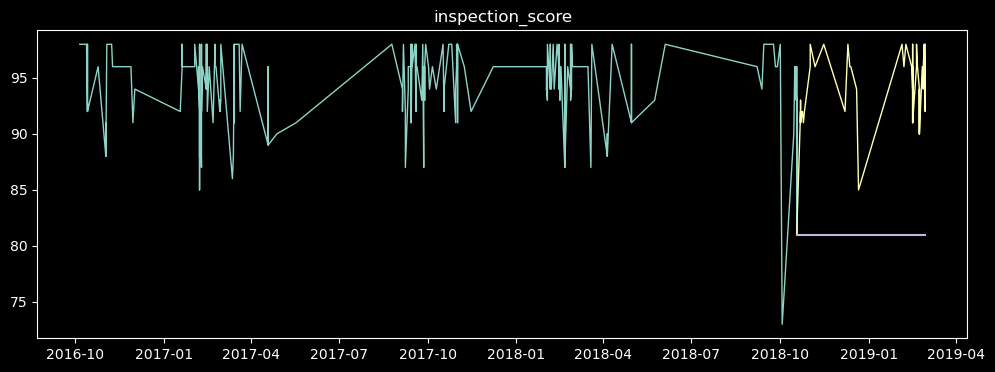

In [29]:
for col in education_train.columns:
    model.plot_and_eval(education_train, education_val, yhat_df, col)

### Last Observed Value 
- Cafe & Bakery

In [30]:
# take the last item of inspection score and assign to variable
last_inspection = cafe_train['inspection_score'][-1:][0]

yhat_df = pd.DataFrame(
    {'inspection_score': [last_inspection]},
    index=cafe_val.index)

yhat_df.head()

,inspection_score
inspection_date,
2018-12-18,69.0
2018-12-18,69.0
2018-12-18,69.0
2018-12-18,69.0
2018-12-18,69.0


inspection_score -- RMSE: 18


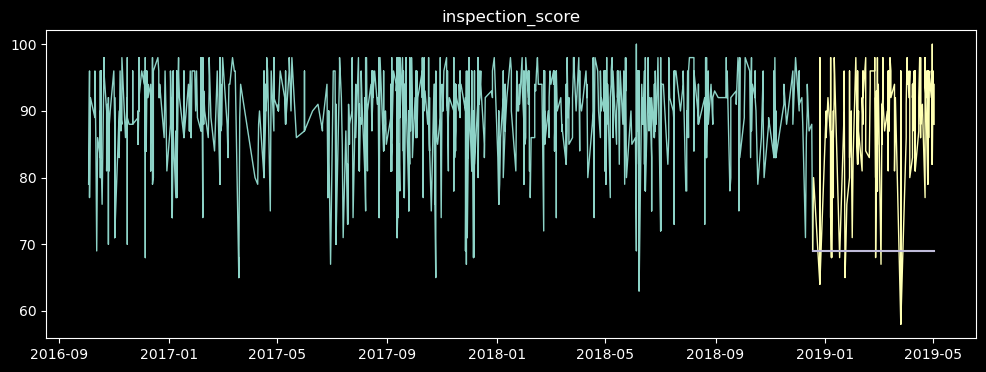

In [31]:
for col in cafe_train.columns:
    model.plot_and_eval(cafe_train, cafe_val, yhat_df, col)

### Last Observed Value 
- Restaurants

In [32]:
# take the last item of inspection score and assign to variable
last_inspection = restaurant_train['inspection_score'][-1:][0]

yhat_df = pd.DataFrame(
    {'inspection_score': [last_inspection]},
    index=restaurant_val.index)

yhat_df.head()

,inspection_score
inspection_date,
2019-01-16,78.0
2019-01-16,78.0
2019-01-16,78.0
2019-01-16,78.0
2019-01-17,78.0


inspection_score -- RMSE: 10


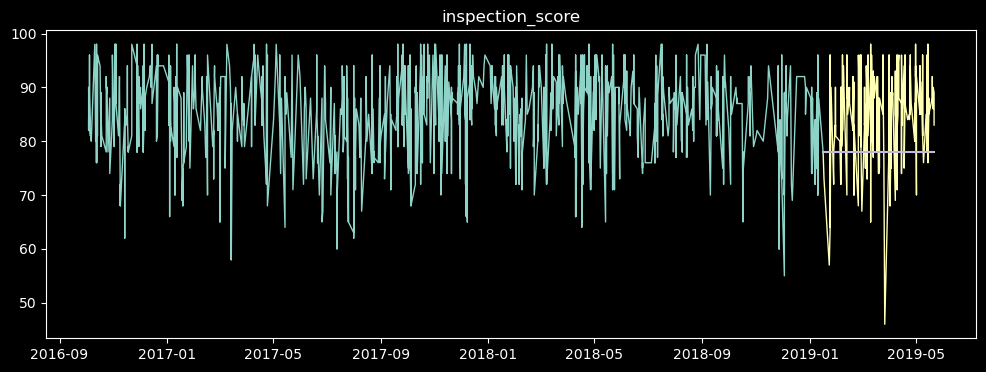

In [33]:
for col in restaurant_train.columns:
    model.plot_and_eval(restaurant_train, restaurant_val, yhat_df, col)

### Simple Average 
- Education

In [34]:
# compute simple average of inspection scores (from train data)
avg_inspection_score = round(education_train['inspection_score'].mean(), 2)


yhat_df = pd.DataFrame({'inspection_score': [avg_inspection_score]},
                        index=education_val.index)

yhat_df.head(3)

,inspection_score
inspection_date,
2018-10-18,92.82
2018-10-22,92.82
2018-10-22,92.82


inspection_score -- RMSE: 4


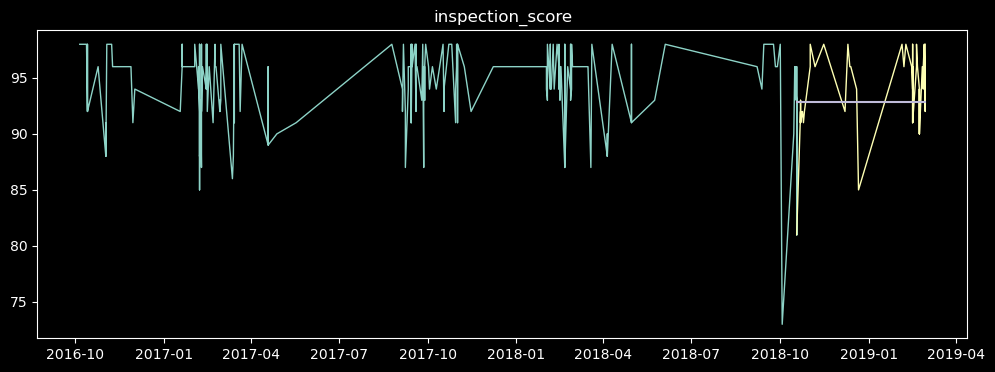

In [35]:
for col in education_train.columns:
    model.plot_and_eval(education_train, education_val, yhat_df, col)

### Simple Average
- Cafe & Bakery

In [36]:
# compute simple average of inspection scores (from train data)
avg_inspection_score = round(cafe_train['inspection_score'].mean(), 2)


yhat_df = pd.DataFrame({'inspection_score': [avg_inspection_score]},
                        index=cafe_val.index)

yhat_df.head(3)

,inspection_score
inspection_date,
2018-12-18,86.21
2018-12-18,86.21
2018-12-18,86.21


inspection_score -- RMSE: 10


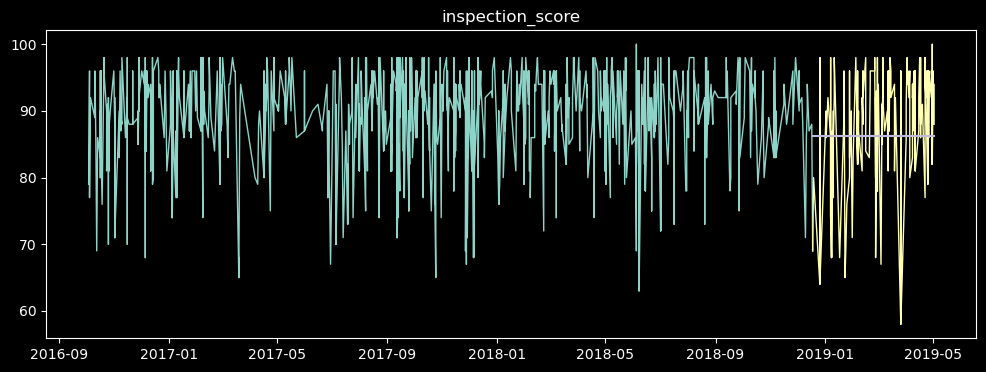

In [37]:
for col in cafe_train.columns:
    model.plot_and_eval(cafe_train, cafe_val, yhat_df, col)

### Simple Average 
- Restaurants

In [38]:
# compute simple average of inspection scores (from train data)
avg_inspection_score = round(restaurant_train['inspection_score'].mean(), 2)


yhat_df = pd.DataFrame({'inspection_score': [avg_inspection_score]},
                        index=restaurant_val.index)

yhat_df.head(3)

,inspection_score
inspection_date,
2019-01-16,82.58
2019-01-16,82.58
2019-01-16,82.58


inspection_score -- RMSE: 9


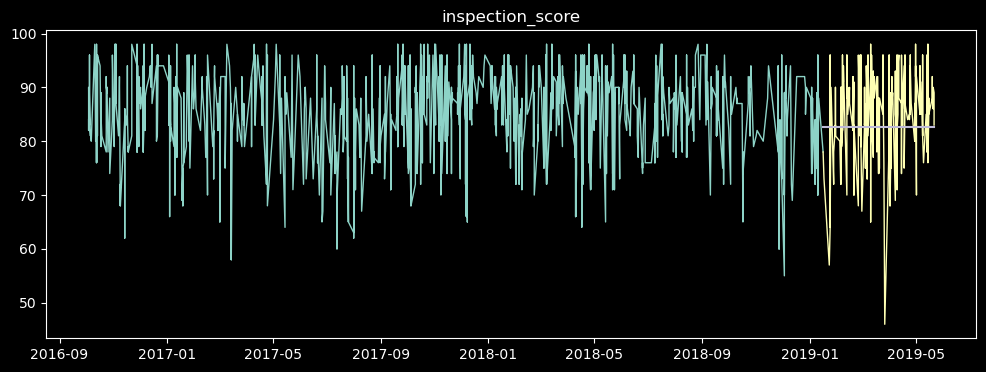

In [39]:
for col in restaurant_train.columns:
    model.plot_and_eval(restaurant_train, restaurant_val, yhat_df, col)

### Moving Average
- Education

In [40]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

rolling_inspection_score = round(education_train['inspection_score'].rolling(period).mean()[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'inspection_score': rolling_inspection_score},
                         index=education_val.index)
yhat_df.head()

,inspection_score
inspection_date,
2018-10-18,85.9
2018-10-22,85.9
2018-10-22,85.9
2018-10-22,85.9
2018-10-22,85.9


inspection_score -- RMSE: 9


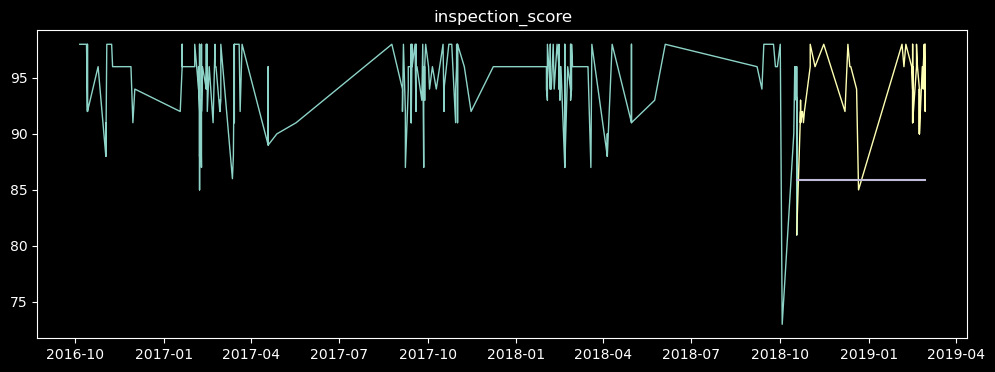

In [41]:
for col in education_train.columns:
    model.plot_and_eval(education_train, education_val, yhat_df, col)

### Moving Average
- Cafe & Bakery

In [42]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 52

rolling_inspection_score = round(cafe_train['inspection_score'].rolling(period).mean()[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'inspection_score': rolling_inspection_score},
                         index=cafe_val.index)
yhat_df.head()

,inspection_score
inspection_date,
2018-12-18,85.33
2018-12-18,85.33
2018-12-18,85.33
2018-12-18,85.33
2018-12-18,85.33


inspection_score -- RMSE: 9


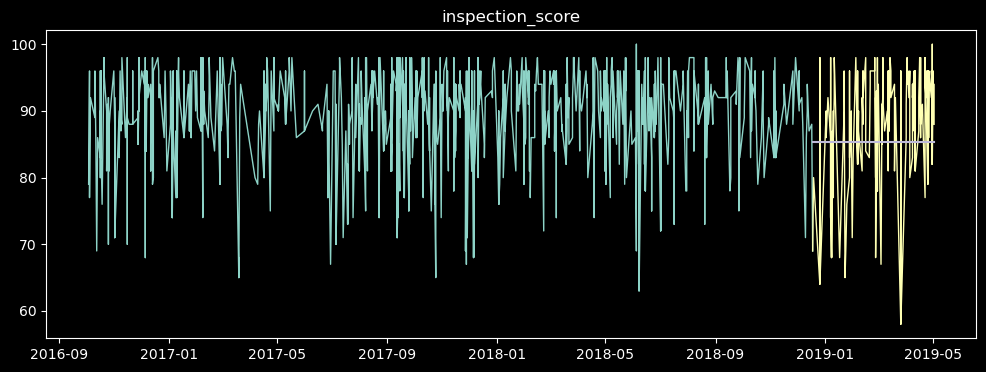

In [43]:
for col in cafe_train.columns:
    model.plot_and_eval(cafe_train, cafe_val, yhat_df, col)

### Moving Average 
- Restaurants

In [44]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 100

rolling_inspection_score = round(restaurant_train['inspection_score'].rolling(period).mean()[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'inspection_score': rolling_inspection_score},
                         index=restaurant_val.index)
yhat_df.head()

,inspection_score
inspection_date,
2019-01-16,82.63
2019-01-16,82.63
2019-01-16,82.63
2019-01-16,82.63
2019-01-17,82.63


inspection_score -- RMSE: 9


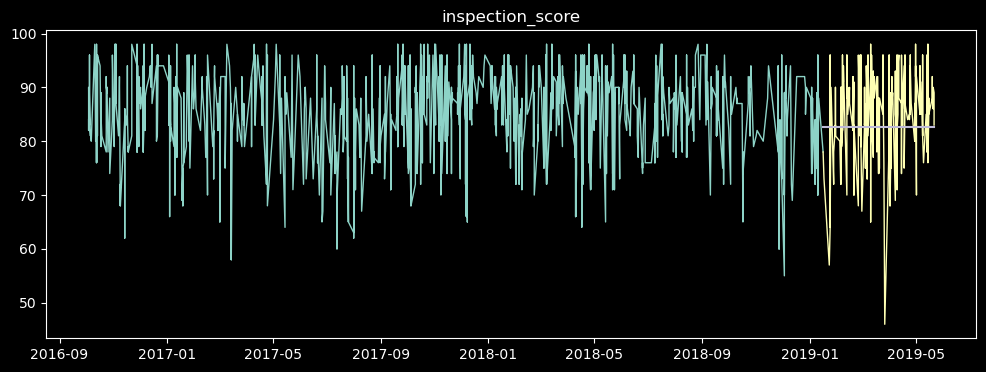

In [45]:
for col in restaurant_train.columns:
    model.plot_and_eval(restaurant_train, restaurant_val, yhat_df, col)

### Holt-Winters

- Non baseline models
- Seasonal Decomposition

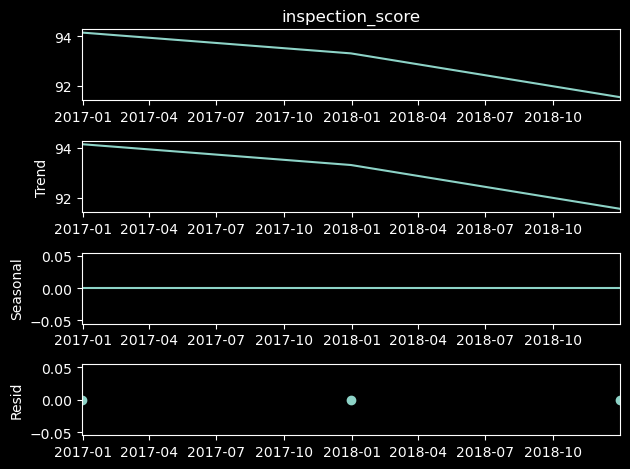

In [46]:
for col in education_train.columns:
    sm.tsa.seasonal_decompose(education_train[col].resample('Y').mean()).plot()


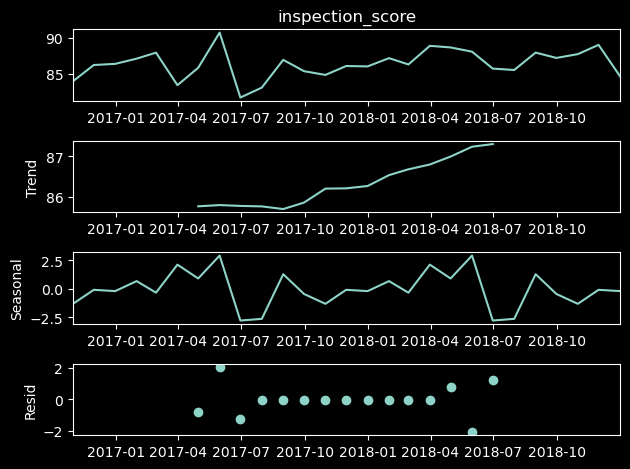

In [47]:
for col in cafe_train.columns:
    sm.tsa.seasonal_decompose(cafe_train[col].resample('M').mean()).plot()

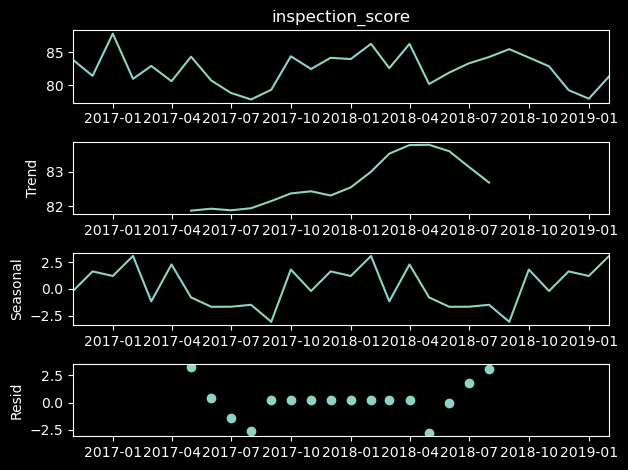

In [48]:
for col in restaurant_train.columns:
    sm.tsa.seasonal_decompose(restaurant_train[col].resample('M').mean()).plot()

# Conclustions 

- Able to forcast inspection scores for restaraunts, cafe & bakery, and educational facilities using time series analysis.
- With the violation discription are simaler across each category.  


# Next Steps 
- create more dataframes for each postal code 